# PS19 Sep - more wordplay
Below you find some useful functions for the following applications (Zipf's law & Markov analysis)

Rem: Plots nog installed by default :-(

In [2]:
# useful functions:
"""Split a String into an Array of Strings, removing whitespace and deleting empty values"""
function splitphrase(phrase)
   split(phrase,keepempty=false)
end

"""Iterate over the Chars in a String and return the letters only of the original String"""
function cleanword(word)
    newword = ""
    for ltr in lowercase(word)
        if isletter(ltr)
            newword = newword*ltr
        end
    end
    return newword
end

"""
Opens a .txt file and returns a cleaned list of chronologically occuring words in the text
Useful for other applications...
"""
function readbook(filename)
    book = readlines(filename)
    wordlist = []
    for line in book
        append!(wordlist,splitphrase(line))
    end
    return cleanword.(wordlist)
end

"""Takes a list of words and returns a dictionay with the words as keys and their frequency as values """
function makehist(list)
    hist = Dict()
    for item in list
        hist[item] = get(hist,item,0) + 1
    end
    return hist
end

makehist (generic function with 1 method)

### Zipf's law

The “rank” of a word is its position in an array of words sorted by frequency: the most common word has rank 1, the second most common has rank 2, etc.

Zipf’s law describes a relationship between the ranks and frequencies of words in natural languages [(cf. Wikipedia)](https://en.wikipedia.org/wiki/Zipf's_law). Specifically, it predicts that the frequency, $f$ of the word with rank $r$ is:
\begin{equation}
f=cr^{−s}
\end{equation}
where $s$ and $c$ are parameters that depend on the language and the text. If you take the logarithm of both sides of this equation, you get:
\begin{equation}
\log{f}=\log{c}-s\log{r}
\end{equation}

So if you plot $\log{f}$ versus $\log{r}$, you should get a straight line with slope $−s$ and intercept $\log{c}$. For the linear regression you can use the following:
```Julia
"""Simple linear regression implementation"""
function linreg(x, y) 
    hcat(fill!(similar(x), 1), x) \ y
end
```

A graphical representation of your data and the model is definitely worth considering. You can use this with the Plots package and the appropriote back-end (e.g. GR). For more information on the Plots package cf. [its documentation](http://docs.juliaplots.org/latest/) and various examples on the web.

```Julia
using Plots
Plots.gr()
```

#### Tasks(s)
* Write a program that reads a text from a file, counts word frequencies. Determine $c$ and $s$ experimentally for texts in different languages.
* Try your application for several texts: "3mousquetaires.txt", "Dracula.txt", "deoogst.txt". Do you observe important differences between the languages?

In [110]:
"""Simple linear regression implementation"""
function linreg(x, y) 
    hcat(fill!(similar(x), 1), x) \ y
end

linreg (generic function with 1 method)

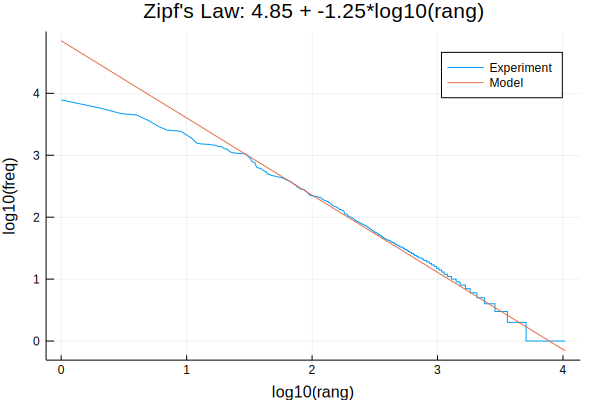

In [133]:
book = readbook("Dracula.txt")
hist = makehist(book)

freqs = sort(collect(values(hist)),rev=true)
rang = 1:length(freqs)

β₀, β₁ = linreg(log10.(rang),log10.(freqs));
F = log10.(freqs)
R = log10.(rang)
plot(R,F,label="Experiment")
plot!(R, β₀ .+  β₁*R, label="Model")
plot!(xlabel="log10(rang)",ylabel="log10(freq)",
    title="Zipf's Law: $(round(β₀,digits=2)) + $(round(β₁,digits=2))*log10(rang) ")

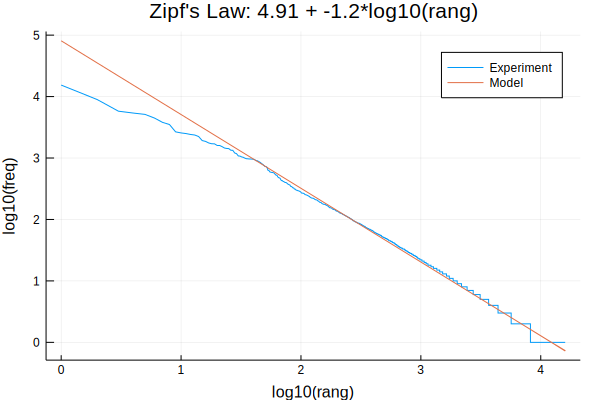

In [135]:
book = readbook("3mousquetaires.txt")
hist = makehist(book)

freqs = sort(collect(values(hist)),rev=true)
rang = 1:length(freqs)

β₀, β₁ = linreg(log10.(rang),log10.(freqs));
F = log10.(freqs)
R = log10.(rang)
plot(R,F,label="Experiment")
plot!(R, β₀ .+  β₁*R, label="Model")
plot!(xlabel="log10(rang)",ylabel="log10(freq)",
    title="Zipf's Law: $(round(β₀,digits=2)) + $(round(β₁,digits=2))*log10(rang) ")

In [ ]:
# adding and setting up plots
using Pkg
Pkg.add("Plots")
using Plots
Plots.gr()

### Markov analysis
A series of random words seldom makes sense because there is no relationship between successive words. For example, in a real sentence you would expect an article like “the” to be followed by an adjective or a noun, and probably not a verb or adverb.

One way to measure these kinds of relationships is Markov analysis, which characterizes, for a given sequence of words, the probability of the words that might come next. For example, the song Eric, the Half a Bee begins:

```
Half a bee, philosophically,
Must, ipso facto, half not be.
But half the bee has got to be
Vis a vis, its entity. D’you see?

But can a bee be said to be
Or not to be an entire bee
When half the bee is not a bee
Due to some ancient injury?
```

In this text, the phrase “half the” is always followed by the word “bee”, but the phrase “the bee” might be followed by either “has” or “is”.

The result of Markov analysis is a mapping from each prefix (like “half the” and “the bee”) to all possible suffixes (like “has” and “is”). suffix)

Given this mapping, you can generate a random text by starting with any prefix and choosing at random from the possible suffixes. Next, you can combine the end of the prefix and the new suffix to form the next prefix, and repeat.

For example, if you start with the prefix “Half a”, then the next word has to be “bee”, because the prefix only appears once in the text. The next prefix is “a bee”, so the next suffix might be “philosophically”, “be” or “due”.

#### Task(s)
* Design an application that takes a text and performs a Markov analysis for a sequence of words. The length $n$ of the sequence should be a variable.
    * You should register not only the possible word to come next, but also its frequency
* Design an application that, for a given sequence, returns the next word, based on the probabilities that you derive from the frequencies (the word should be chosen at random, taking into account the probabilities.
* Use the two tools you just built to generate a random text, based on $n$ starting words of a given length $N$
    * Try it out on the poem, is the result as expected?

#### Tips
`Categorical` from the `Distributions` package might come in handy for everything linked to random choice based on frequency (cf. [documentation](https://github.com/JuliaStats/Distributions.jl) or [Categorical](https://juliastats.github.io/Distributions.jl/latest/univariate.html#Discrete-Distributions-1) )

```Julia
using Distributions
?Distributions.Categorical()
```


When you apply your text generation function on the Dracula book, you could get for instance on of the following results:

>saw across him as we can only guess at which i do not die by mere passing of the most advanced scientists of his existence in his voice and with this so clever woman he loved was buried alive and that we deal with gods sanction shall make you even at such a wellbehaved man and wanted to see your sweet letter it was not unprepared for this request for i thought it well and though i have made her truly his bride yes and of heavy wheels the crack of whips and the wood without saying any more and more quiet

>hunting parties and adventures in different parts of the door was fastened being around both wrists and wheel and circle round till i came away i mistrust these quiet moods of his wife all the girl must be brave of heart and feel oh so kindly i am thus dead in the driver however was it gave me double share instead i got a letter simply telling him to me we mean to take counsel together she shuddered and was concerned for i was soon at their tethers till i send to me and now she seems strong and grow and attempt


In [15]:
# initial debugging and prototyping phase
poem = "Half a bee, philosophically,
Must, ipso facto, half not be.
But half the bee has got to be
Vis a vis, its entity. D’you see?

But can a bee be said to be
Or not to be an entire bee
When half the bee is not a bee
Due to some ancient injury?"

chronlist = cleanword.(splitphrase(poem));
manalyse = markov(chronlist,2)
maketext(20,manalyse)

"got to be vis a vis its entity dyou see but can a bee philosophically must ipso facto half not be but"

In [14]:
# small check
a = [randomword(["a","bee"],manalyse) for i in 1:1000]
length(a[a.=="philosophically"]) # should be about 333

327

In [2]:
# dependency
using Distributions

# useful functions:
"""Split a String into an Array of Strings, removing whitespace and deleting empty values"""
function splitphrase(phrase)
   split(phrase,keepempty=false)
end

"""Iterate over the Chars in a String and return the letters only of the original String"""
function cleanword(word)
    newword = ""
    for ltr in lowercase(word)
        if isletter(ltr)
            newword = newword*ltr
        end
    end
    return newword
end

"""
Opens a .txt file and returns a cleaned list of chronologically occuring words in the text
Useful for other applications...
"""
function readbook(filename)
    book = readlines(filename)
    wordlist = []
    for line in book
        append!(wordlist,splitphrase(line))
    end
    return cleanword.(wordlist)
end

"""make a markov chain analysis for given length n"""
function markov(list,n=2)
    dic = Dict()
    for i in 1:length(list)-n
        key = list[i:i+(n-1)]
        nword = list[i+n]
        minidic = get!(dic,key,Dict())
        minidic[nword] = get!(minidic,nword,0) + 1
    end
    return dic
end

"""return a random next word from a markovanalysis"""
function randomword(q,bigdic::Dict)
    dic = bigdic[q]
    val = values(dic)
    p = val./sum(val)
    dist = Distributions.Categorical(p)
    k = rand(dist)
    return collect(keys(dic))[k]
end

"""generate a random text of length N for a key with length n"""
function maketext(N,dic,n=2)
    startpoint = rand(keys(dic))
    text = copy(startpoint)
    for i in 1:N
        # method to deal with errors, more detail cf. course 25 Sep
        # alternative solution instead of the error: 
        # print a warning and return the text that has been obtained.
        try
            push!(text, randomword(text[i:i+(n-1)],dic))
        catch
            throw(DomainError(" text:\n'$(join(text," "))'", "
    Loop was interrupted before reaching the desired length.
    This is due to reaching the last words of the text, no follow-up word is known."))
        end
    end
    return join(text," ")
end

"""Function to put it all together: text file as input, text of random length as output"""
function markovetext(source,n=2,N=30)
    list = readbook(source)
    manalyse = markov(list,n)
    maketext(N,manalyse,n)
end

markovetext (generic function with 3 methods)

In [16]:
markovetext("deoogst.txt",2,80)

"de strepen van haar kleeren uitlijnde ze waren gansch alleen het nest bezorgen tot ik weerkeerde ho dan viel er onmachtig neer op zijn dorp te zijn een onbewuste droefheid overviel hem in dat lommerland zonder einde dat zou te weten dat hier al de vermoeienis en ze kwam altijd opeenstapelen lijk in een ongenaakbaar verre verledenheid rik vond noch tijd van uitscheiden schaars éen die met de bende zijn groote broeders en van al het koorn is àf de herbergen overal"

In [18]:
markovetext("3mousquetaires.txt",2,40)

"rendait légal des plus lamentables  et quelque péril que je ne vous aije pas dit quil était à peine cheveux moustache et royale sen allaient grisonnant cet homme va donner les derniers ordres  monseigneur je nen sais rien au monde"

In [19]:
markovetext("Dracula.txt",2,60)

"iron bands this is the more and more uneasy in her voice swooped upon him makes him nervous he begins to flirt with me until i reached a passage where it lies before the others for with one foot abaft the bierbank read it i suppose that you had better go with quincey we have been free i can remember all that"

In [25]:
# random Donald Trump giberish
markovetext("speeches.txt",2,70)

"incredible cover story they said solely for one second  and then it goes to  calls and see israel they must serve prison time  america must do more business to these horrible corrupt pacs   just to show solidarity with the migration caused by hillary clinton who supported one terrible trade deals were going to let it happen before a writer called up and make it rich again and"